# Importing libraries 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter("ignore")


# Loading dataset

In [80]:
df=load_iris(as_frame=True).data
target=load_iris().target
df['target']=target

# Basic informations 
shape, columns type, first look at data

In [43]:
df.shape

(150, 5)

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


# Missing values check
No missing values in this dataset

In [46]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

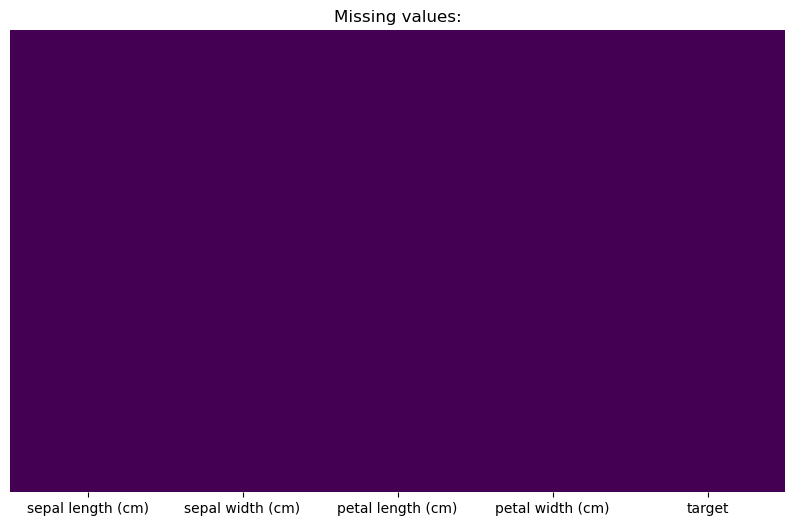

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing values:")
plt.show()

# Outliers check
We can see some in sepal width

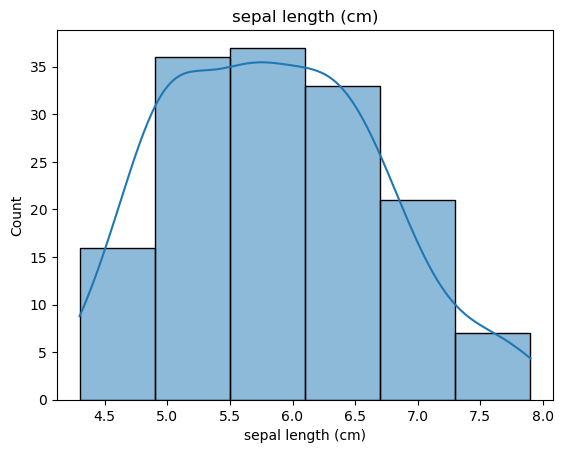

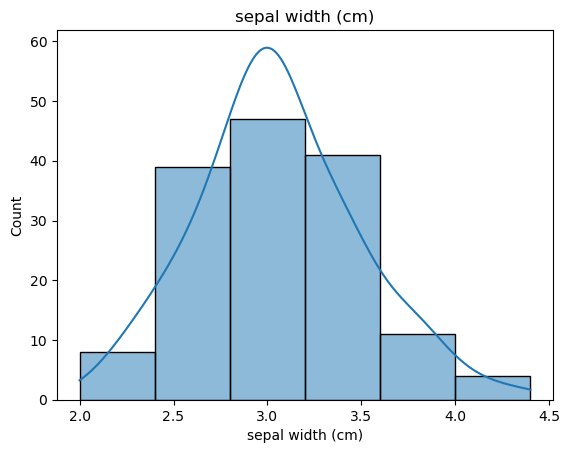

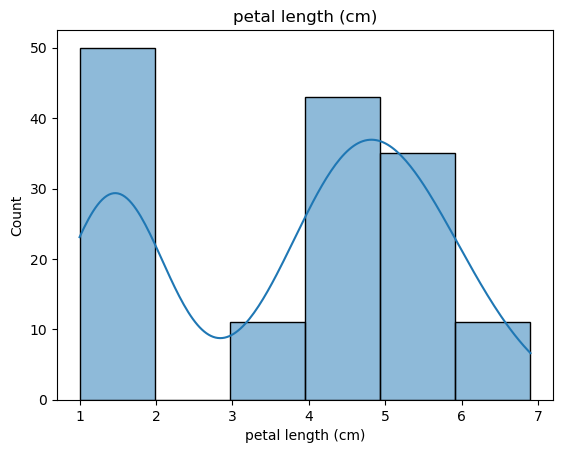

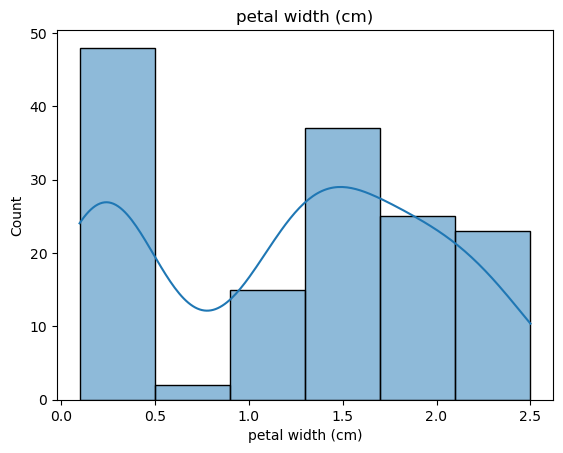

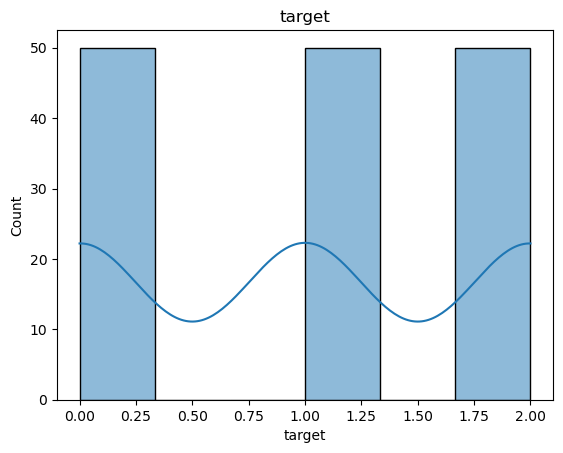

In [48]:
for col in df.columns:
    sns.histplot(df[col], bins=6, kde=True)
    plt.title(col)
    plt.show()

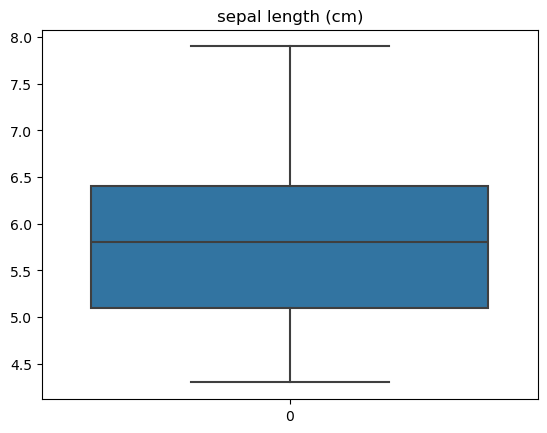

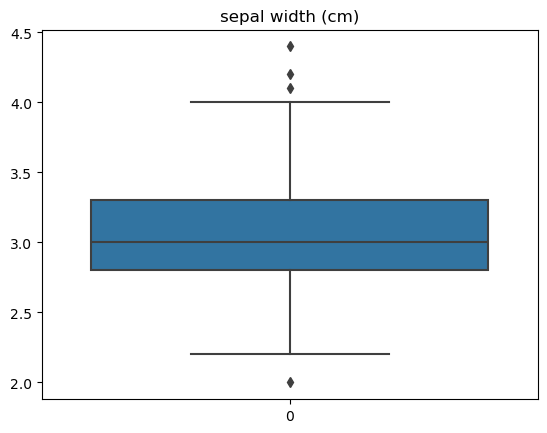

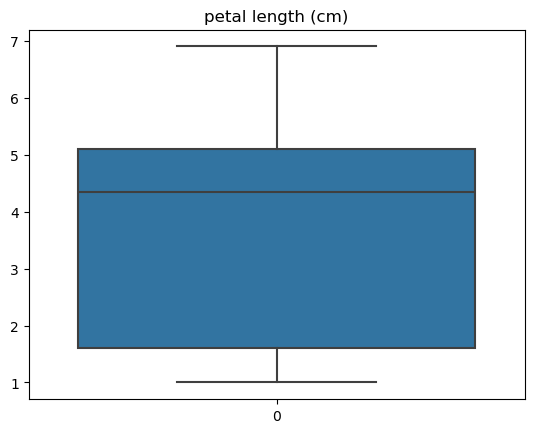

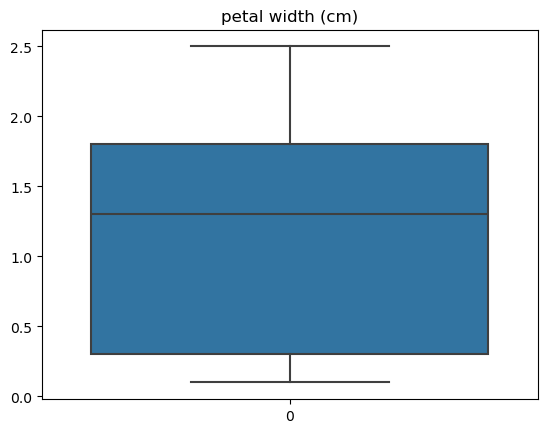

In [87]:
for col in df.iloc[:,:-1].columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [50]:
#we can see some outliers in sepal width
df.query('`sepal width (cm)` > 4')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


# Correlations check
Correlation matrix and scatter plots for highly correlated columns

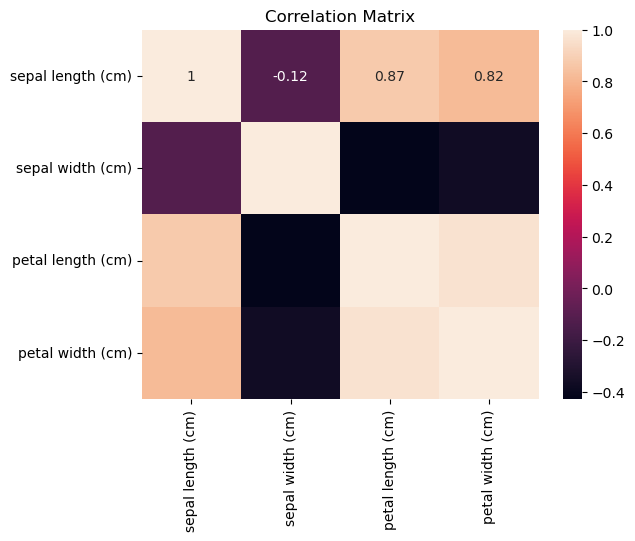

In [88]:
corr=df.iloc[:,:-1].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [74]:
colors_dict={0:'green', 1:'red', 2:'blue'}
colors=df['target'].map(colors_dict)

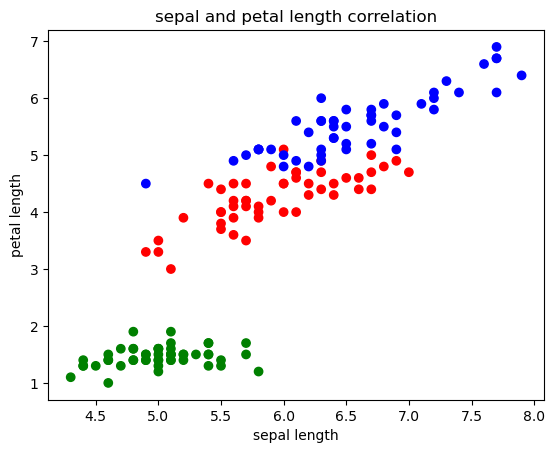

In [79]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=colors)
plt.title('sepal and petal length correlation')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

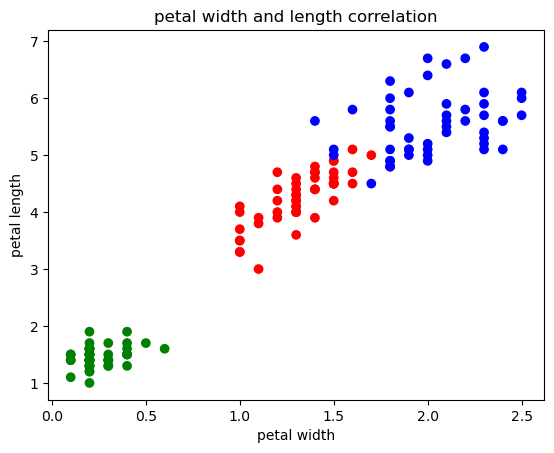

In [77]:
plt.scatter(df['petal width (cm)'], df['petal length (cm)'], c=colors)
plt.title('petal width and length correlation')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.show()

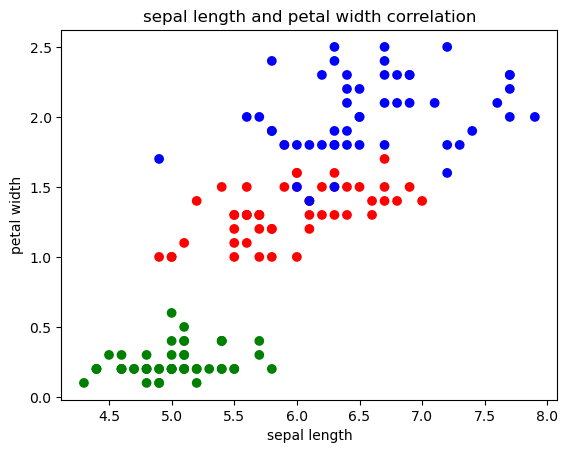

In [78]:
plt.scatter(df['sepal length (cm)'], df['petal width (cm)'], c=colors)
plt.title('sepal length and petal width correlation')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()

# Dimensionality Reduction
PCA

In [113]:
from sklearn.decomposition import PCA
df_no_target=df.drop('target',axis=1)
pca=PCA(n_components=2).fit(df_no_target)
lower_dim_points= pca.transform(df_no_target)
print(f"explained variance ratio: {pca.explained_variance_ratio_}")

explained variance ratio: [0.92461872 0.05306648]


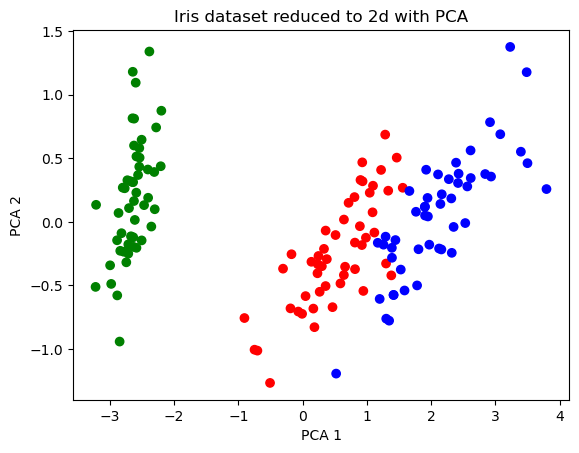

In [118]:
plt.scatter(lower_dim_points[:,0], lower_dim_points[:,1], c=colors)
plt.title('Iris dataset reduced to 2d with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

t-SNE

In [122]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
lower_dim_points = tsne.fit_transform(df_no_target)  

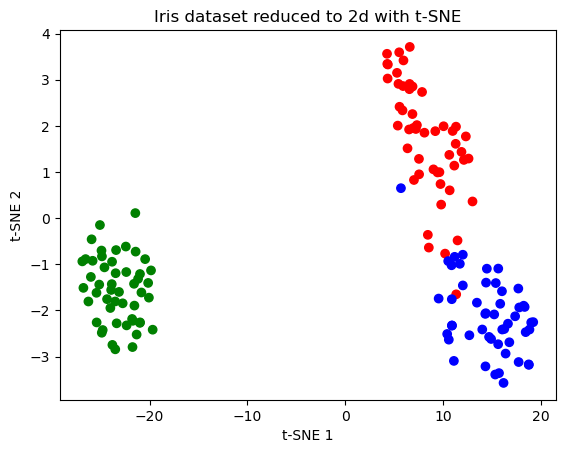

In [124]:
plt.scatter(lower_dim_points[:,0], lower_dim_points[:,1], c=colors)
plt.title('Iris dataset reduced to 2d with t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()